# Load dataset

**record name , balanced sample**
- record 04015 -> 400
- record 04043 -> 1000
- record 04048 -> 900
- record 04908 -> tidak bisa di split karena hanya AF
- record 04936 -> 2000
- record 05091 -> 1000, class 0 29
- record 05121 -> 1000, class 0, 150
- record 05261 -> 1000, class 0 105
- record 06426 -> 2000
- record 06453 -> 300
- record 06995 -> 900
- record 07910 -> 320
- record 08215 -> 400
- record 08219 -> 5000
- record 08378 -> 220
- record 08455 -> 90

In [1]:
record = "08455"
n_samples = 90 

In [2]:
import os

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
    if filename.find('sequence') > -1 :
        filenames.append(filename)

In [3]:
filenames

['AFDB_04015_sequence_300_pt.csv',
 'AFDB_04043_sequence_300_pt.csv',
 'AFDB_04048_sequence_300_pt.csv',
 'AFDB_04126_sequence_300_pt.csv',
 'AFDB_04908_sequence_300_pt.csv',
 'AFDB_04936_sequence_300_pt.csv',
 'AFDB_05091_sequence_300_pt.csv',
 'AFDB_05121_sequence_300_pt.csv',
 'AFDB_05261_sequence_300_pt.csv',
 'AFDB_06426_sequence_300_pt.csv',
 'AFDB_06453_sequence_300_pt.csv',
 'AFDB_06995_sequence_300_pt.csv',
 'AFDB_07910_sequence_300_pt.csv',
 'AFDB_08215_sequence_300_pt.csv',
 'AFDB_08219_sequence_300_pt.csv',
 'AFDB_08378_sequence_300_pt.csv',
 'AFDB_08455_sequence_300_pt.csv']

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

- Split Dataset

In [5]:
ecg_df = pd.read_csv(dataset_folder + 'AFDB_%s_sequence_300_pt.csv' % record, header=None)

In [6]:
ecg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.022063,0.023793,0.052812,0.007384,-0.011693,0.050777,0.081983,0.050719,0.024180,0.059964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.211886,0.340338,0.564663,0.784049,0.895281,0.862343,0.687615,0.416675,0.133498,-0.097141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.359834,0.492563,0.706800,0.908933,0.918940,0.703201,0.427300,0.216014,-0.002688,-0.164033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.351851,0.523014,0.761263,0.932185,0.918162,0.697579,0.428818,0.200659,-0.034928,-0.174766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.353373,0.522368,0.748840,0.907975,0.906154,0.724158,0.457968,0.193961,-0.058294,-0.183620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


In [7]:
X = ecg_df.iloc[:,:300].values
y = ecg_df.iloc[:,300].values

le = LabelEncoder()
le.fit(y)

labels = le.classes_
print(" categorical label : ", labels)

y = le.transform(y)

 categorical label :  ['AF' 'N']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.33, random_state=42)

In [9]:
train_df = pd.DataFrame(np.hstack((X_train, np.expand_dims(y_train, 1))))
test_df = pd.DataFrame(np.hstack((X_test, np.expand_dims(y_test, 1))))

- 1 sequence terdiri dari 300 titik data , kolom terakhir merupakan label untuk tiap sequence

In [10]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.077448,0.159095,0.335717,0.547274,0.733726,0.875050,0.966232,0.832153,0.500307,0.185790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.142766,0.246951,0.424413,0.665362,0.852386,0.936553,0.873821,0.649490,0.346694,0.036334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.017261,0.080442,0.250059,0.402781,0.560203,0.753519,0.949117,0.964575,0.723070,0.411787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.046743,0.128240,0.317267,0.523323,0.685255,0.827513,0.901169,0.783912,0.468384,0.157569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.041022,0.058016,0.196082,0.309582,0.459661,0.692784,0.884207,0.938530,0.777471,0.535534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Balancing Dataset
Untuk kebutuhan training model, kita akan atur agar sample tiap class memiliki proporsi yang sama.

In [11]:
#print dataset distribution

train_df[300]=train_df[300].astype(int)
equilibre=train_df[300].value_counts()

print(equilibre)

1    97
0    58
Name: 300, dtype: int64


- Terlihat jika tiap katerogi memiliki jumlah sample yang berbeda.

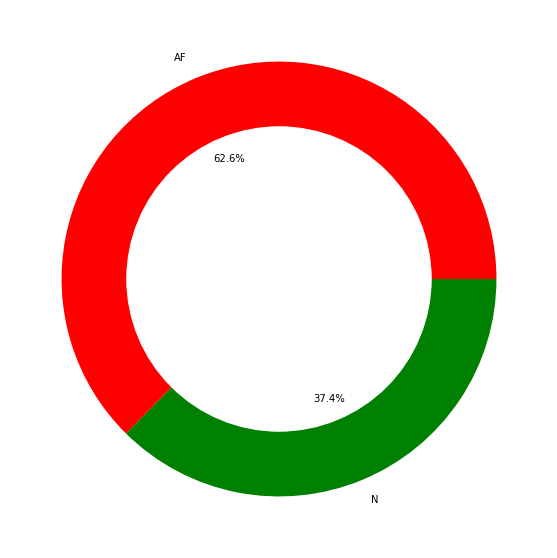

In [12]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=labels, 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- kita akan membuat seluruh class memiliki jumlah sample sebanyak 20000. 
- Sehingga untuk class `0` yang memiliki sample 72471, akan dilakukan pemilihan acak sebanyak 20000 dengan menggunakan Pandas Dataframe `.sample()`.
- Untuk class lainya, karena dibawah 20000 sample, akan diterapkan proses upsampling menjadi 20000 sample menggunakan sklearn `resample()`.

In [13]:
# sampling and resampling dataset

from sklearn.utils import resample

random_states = [42, 123]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[300]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [14]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
113,-0.046689,0.017902,0.166915,0.407602,0.614545,0.768460,0.907951,0.931712,0.714313,0.357060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
136,0.188273,0.355377,0.573060,0.761713,0.868261,0.849272,0.690255,0.420135,0.128140,-0.062737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
84,0.145365,0.319007,0.582340,0.790984,0.885869,0.950103,0.867732,0.551236,0.162456,-0.073333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
48,0.134702,0.263668,0.484529,0.705404,0.869409,0.915280,0.886748,0.656918,0.258572,-0.045827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
117,-0.002117,0.059391,0.234601,0.416244,0.587152,0.758047,0.913900,0.910965,0.687011,0.368586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Sekarang kita memiliki dataset yang sudah balance.

In [15]:
# cek balanced dataset

equilibre=train_df[300].value_counts()

print(equilibre)

1    90
0    90
Name: 300, dtype: int64


## Understanding ECG Signal
- Sekarang kita ambil 1 sample tiap class untuk melihat profile heart beat masing-masing class.
- Ini berguna untuk kita agar dapat memahami karakteristik sinyal ECG untuk tiap class.
- Task ini mudah dilakukan menggunakan pandas,  `.groupby()` pada kolom 187 (kolom class) dan dengan menggunakan fungsi `.apply()` kita ambil 1 sample data menggunakan `.sample()`.

In [16]:
ECG_PER_CLASS =train_df.groupby(300,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [17]:
ECG_PER_CLASS

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
33,0.146044,0.274785,0.478207,0.662228,0.790658,0.851423,0.784204,0.540737,0.229546,-0.016726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.017261,0.080442,0.250059,0.402781,0.560203,0.753519,0.949117,0.964575,0.723070,0.411787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


- Pertama kita plot tiap sample pada dataframe `ECG_PER_CLASS` menggunakan pandas `.plot()`.
- Setelah itu kita plot 2D histogram untuk keseluruhan sample ECG tiap class menggunakan fungsi `plot_hist()` yang kita buat dibawah.
- Pada plot histogram, daerah dengan intensitas lebih terang menandakan banyak titik sample pada waktu dan nilai ECG tersebut.
- Sebaliknya untuk daerah yang lebih gelap.

In [18]:
def plot_1_sample(class_number, fs=250):
    data = ECG_PER_CLASS.iloc[class_number,:300]
    times = np.arange(data.shape[0], dtype='float') / fs * 1000
    
    plt.plot(times, data)
    plt.title("Plot 1 sample in class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

In [19]:
def plot_hist(class_number, min_, size, fs=250):
    # filter data berdasarkan class_number 
    ECG=train_df.loc[train_df[300]==class_number].values
    
    # scale tm value (*1000) agar bisa ditampilkan dalam satuam (ms)
    tm = np.arange(ECG.shape[1], dtype='float') / fs * 1000
    
    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    times = np.tile(tm[min_:size], ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(times, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D histogram on class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

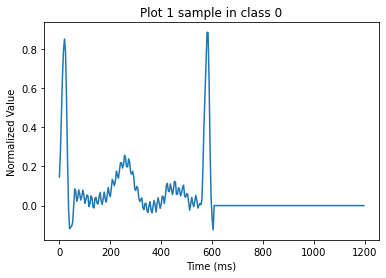

In [20]:
plot_1_sample(class_number=0)

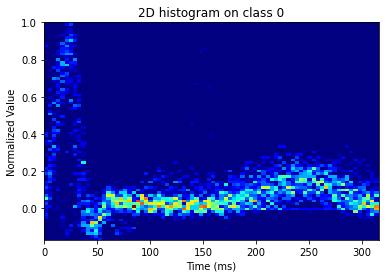

In [21]:
plot_hist(class_number=0, min_=0, size=80)

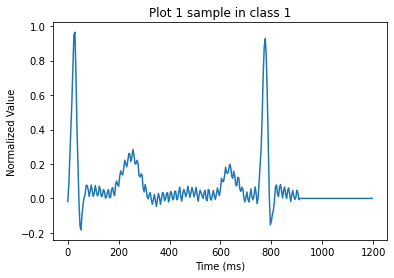

In [22]:
plot_1_sample(class_number=1)

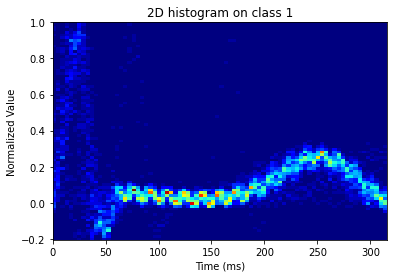

In [23]:
plot_hist(class_number=1, min_=0, size=80)

### Save Balanced Training Data and Test Data

In [24]:
train_df.to_csv(dataset_folder + "train_AFDB_%s_balanced.csv" % record, header=None, index=None)
test_df.to_csv(dataset_folder + "test_AFDB_%s.csv" % record, header=None, index=None)